In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
X_train = X_train.reshape(60000, 28*28)
# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

In [5]:
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
__________

In [7]:
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

In [8]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total para

In [9]:
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.
epoch = 1/100, d_loss=0.642, g_loss=1.816                                                                                                     


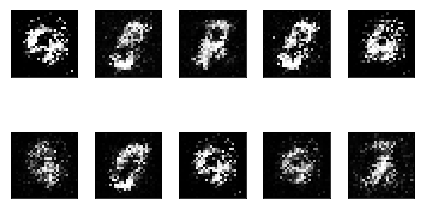

epoch = 2/100, d_loss=0.725, g_loss=1.733                                                                                                     
epoch = 3/100, d_loss=0.539, g_loss=1.773                                                                                                     
epoch = 4/100, d_loss=0.570, g_loss=1.412                                                                                                     
epoch = 5/100, d_loss=0.561, g_loss=1.336                                                                                                     
epoch = 6/100, d_loss=0.529, g_loss=1.409                                                                                                     
epoch = 7/100, d_loss=0.593, g_loss=1.216                                                                                                     
epoch = 8/100, d_loss=0.605, g_loss=1.211                                                                                                     

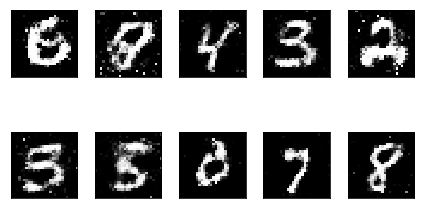

epoch = 12/100, d_loss=0.578, g_loss=1.237                                                                                                     
epoch = 13/100, d_loss=0.587, g_loss=1.159                                                                                                     
epoch = 14/100, d_loss=0.554, g_loss=1.167                                                                                                     
epoch = 15/100, d_loss=0.637, g_loss=1.101                                                                                                     
epoch = 16/100, d_loss=0.586, g_loss=1.146                                                                                                     
epoch = 17/100, d_loss=0.604, g_loss=1.163                                                                                                     
epoch = 18/100, d_loss=0.600, g_loss=1.163                                                                                              

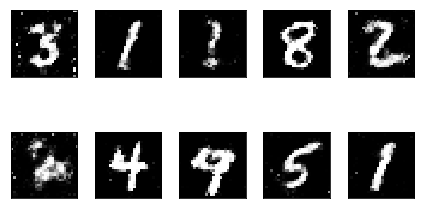

epoch = 22/100, d_loss=0.588, g_loss=1.178                                                                                                     
epoch = 23/100, d_loss=0.578, g_loss=1.158                                                                                                     
epoch = 24/100, d_loss=0.630, g_loss=1.109                                                                                                     
epoch = 25/100, d_loss=0.603, g_loss=1.089                                                                                                     
epoch = 26/100, d_loss=0.575, g_loss=1.149                                                                                                     
epoch = 27/100, d_loss=0.596, g_loss=1.076                                                                                                     
epoch = 28/100, d_loss=0.585, g_loss=1.161                                                                                              

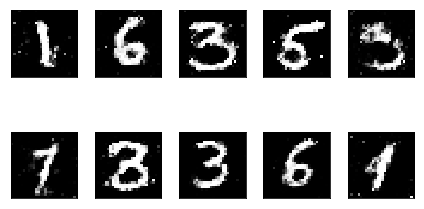

epoch = 32/100, d_loss=0.582, g_loss=1.243                                                                                                     
epoch = 33/100, d_loss=0.545, g_loss=1.183                                                                                                     
epoch = 34/100, d_loss=0.588, g_loss=1.147                                                                                                     
epoch = 35/100, d_loss=0.623, g_loss=1.178                                                                                                     
epoch = 36/100, d_loss=0.604, g_loss=1.140                                                                                                     
epoch = 37/100, d_loss=0.650, g_loss=1.206                                                                                                     
epoch = 38/100, d_loss=0.590, g_loss=1.159                                                                                              

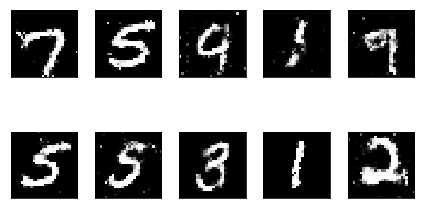

In [11]:
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

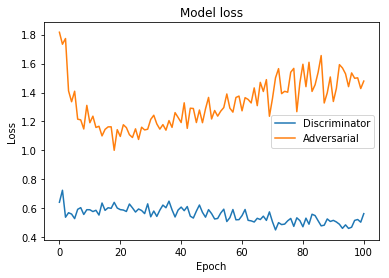

In [12]:
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()